In [54]:
import tensorflow as tf
import numpy as np
import pandas as pd
import glob
import math
import matplotlib.pyplot as plt
import time
all_files = glob.glob('*.csv')

temp = []
for filename in all_files:
    df = pd.concat((pd.read_csv(f) for f in all_files))
    temp.append(df)
frame = pd.concat(temp, axis=0, ignore_index=True)

In [55]:
frame = frame.drop('No', 1)


In [56]:
#fetch train-data and test_data
train_data=frame.loc[frame['year']!=2017 ]
test_data=frame.loc[frame['year']==2017]
test_data

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
33648,2017,1,1,0,497.0,580.0,8.0,112.0,6800.0,4.0,-5.3,1018.3,-7.1,0.0,S,0.8,Gucheng
33649,2017,1,1,1,476.0,546.0,7.0,111.0,6800.0,4.0,-5.4,1018.7,-7.1,0.0,S,1.1,Gucheng
33650,2017,1,1,2,475.0,546.0,7.0,114.0,6800.0,4.0,-5.9,1018.8,-7.6,0.0,S,1.5,Gucheng
33651,2017,1,1,3,447.0,509.0,6.0,118.0,6700.0,4.0,-6.5,1018.8,-8.0,0.0,SSE,0.7,Gucheng
33652,2017,1,1,4,432.0,470.0,6.0,115.0,6800.0,3.0,-6.9,1018.1,-8.4,0.0,WSW,0.3,Gucheng
33653,2017,1,1,5,420.0,461.0,6.0,115.0,6800.0,3.0,-6.8,1017.5,-8.3,0.0,S,1.4,Gucheng
33654,2017,1,1,6,410.0,461.0,6.0,119.0,6900.0,3.0,-7.1,1017.6,-8.6,0.0,S,1.3,Gucheng
33655,2017,1,1,7,423.0,481.0,7.0,120.0,6900.0,3.0,-7.5,1018.3,-8.9,0.0,S,0.7,Gucheng
33656,2017,1,1,8,432.0,482.0,6.0,113.0,7000.0,3.0,-8.1,1018.7,-9.6,0.0,NNW,0.5,Gucheng
33657,2017,1,1,9,421.0,477.0,7.0,112.0,7200.0,3.0,-6.3,1019.0,-7.7,0.0,S,0.6,Gucheng


In [57]:
#initialize x and y
x_train_TEMP=np.array(train_data['TEMP'].values)
x_train_PRES=np.array(train_data['PRES'].values)
x_train_DEWP=np.array(train_data['DEWP'].values)
x_train_RAIN=np.array(train_data['RAIN'].values)
x_train_wd=np.array(train_data['wd'].values)
x_train_WSPM=np.array(train_data['WSPM'].values)

x_test_TEMP=np.array(test_data['TEMP'].values)
x_test_PRES=np.array(test_data['PRES'].values)
x_test_DEWP=np.array(test_data['DEWP'].values)
x_test_RAIN=np.array(test_data['RAIN'].values)
x_test_wd=np.array(test_data['wd'].values)
x_test_WSPM=np.array(test_data['WSPM'].values)

y_train=np.array(train_data['PM2.5'].values)
y_test=np.array(test_data['PM2.5'].values)

#multidimentional data
x_train=np.array(train_data[['TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM']].values)
x_test=np.array(test_data[['TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM']].values)


In [117]:
#this method receives 2 sets, one is the training set one is the label
#this method will train a linear model for 1-d and return it
#eta--the learing rate
def train_simple(X,Y,X_test,Y_test,eta,epochs):
    original=0     #the original weight^2+bias^2
    #set placeholders and variables
    x=tf.placeholder('float')
    y=tf.placeholder('float')
    weight=tf.Variable(np.random.normal())
    bias=tf.Variable(np.random.normal())
    #the prediction with the current model
    result=tf.add(tf.multiply(weight,x),bias)
    loss=tf.reduce_mean(tf.square(result-y))
    optimizer=tf.train.GradientDescentOptimizer(eta).minimize(loss)  #can choose adam if you want
    feed_dict={x:X,y:Y}
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch in range(epochs):
            sess.run(optimizer,feed_dict=feed_dict)
            if(epoch%50==0):
                print('epoch=={} the result is:'.format(epoch))
                print('cost:{}'.format(sess.run(loss,feed_dict=feed_dict)))
                print('w:{}'.format(weight.eval()))
                print('b:{}'.format(bias.eval()))
                print()
        print('the final result:')
        print(weight.eval())
        print(bias.eval())
        print('start testing:')
        prediction=sess.run(result,feed_dict={x:X_test})
        trainingLoss=sess.run(loss,feed_dict={x:X,y:Y})/Y.shape[0]
        testLoss=sess.run(loss,feed_dict={x:X_test,y:Y_test})/Y_test.shape[0]
        print('the average error for trainging:')
        print(trainingLoss)
        print('the average error for testing:')
        print(testLoss)
        return X_test,Y_test,prediction,trainingLoss,testLoss
        
        
        
    
            
        
            

In [111]:
def plot_simple(X,Y,X_test,Y_test,eta,epochs):
    x1,y1=removeNan(X,Y)
    x2,y2=removeNan(X_test[:min(X_test.shape[0],Y_test.shape[0])],Y_test[:min(X_test.shape[0],Y_test.shape[0])])
    x,y,pred,train_loss,test_loss=train_simple(x1,y1,x2,y2,eta,epochs)
    plt.scatter(x2,y2,c='r',s=0.005)
    plt.plot(x2,pred,c='g')
    plt.autoscale(enable=True, axis='y', tight=True)
    plt.ylim(np.min(y2),np.max(y2))
    plt.show()
    

In [60]:
# remove all nan's from x and y
#if x(or y) contains nan on index i then remove the the i th element from both lists
def removeNan(X,Y):
    temp1 = np.argwhere(np.isnan(X)).T
    temp2= np.argwhere(np.isnan(Y)).T
    temp=list(set(temp2[0]).union(set(temp1[0])))
    x1=np.delete(X,temp)
    x2=np.delete(Y,temp)
    return x1,x2

def removeNan_str(X,Y):
    temp1 = np.argwhere(pd.isnull(X)).T
    temp2= np.argwhere(np.isnan(Y)).T
    temp=list(set(temp2[0]).union(set(temp1[0])))
    x1=np.delete(X,temp)
    x2=np.delete(Y,temp)
    return x1,x2
    

In [61]:
# represent the wind's direction as a number (radius)
#this method receives a set and change everything to a number
def getWindAngle(Z):
    Y=[]
    for direct in Z:
        if pd.isnull(direct):
            Y.append(math.nan)
        elif direct =='SW':
            Y.append(np.radians(225))
        elif direct =='N':
            Y.append(np.radians(0))
        elif direct =='NNW':
            Y.append(np.radians(337.5))
        elif direct =='WNW':
            Y.append(np.radians(292.5))
        elif direct =='WSW':
            Y.append(np.radians(247.5))
        elif direct =='E':
            Y.append(np.radians(90))
        elif direct =='NE':
            Y.append(np.radians(45))
        elif direct =='ENE':
            Y.append(np.radians(67.5))
        elif direct =='ESE':
            Y.append(np.radians(112.5))
        elif direct =='S':
            Y.append(np.radians(180))
        elif direct =='SE':
            Y.append(np.radians(135))
        elif direct =='SSE':
            Y.append(np.radians(157.5))
        elif direct =='SSW':
            Y.append(np.radians(202.5))
        elif direct =='NNE':
            Y.append(np.radians(22.5))
        elif direct =='NW':
            Y.append(np.radians(315.5))
        elif direct =='W':
            Y.append(np.radians(270))
        
    return np.array(Y)
        
            
            
    

In [62]:
#check how many directions
print(set(x_train_wd))

{'NNE', 'SE', nan, 'NE', 'E', 'SW', 'WNW', 'W', 'NW', 'ENE', 'S', 'NNW', 'ESE', 'N', 'SSE', 'SSW', 'WSW'}


In [106]:
def plot_simple_wind(eta,epochs):
    # this step removes all nans in wind and y then change the string in wd to numbers
    global x_train_wd,y_train,x_test_wd,y_test
    wd_new,y_new=removeNan_str(x_train_wd,y_train)
   
    wd_test,y_test=removeNan_str(x_test_wd,y_test)
    wd_test,y_test=wd_test[:min(wd_test.shape[0],y_test.shape[0])],y_test[:min(wd_test.shape[0],y_test.shape[0])]
    wd_new=getWindAngle(wd_new)
    wd_test=getWindAngle(wd_test)
    x,y,pred,train_loss,test_loss=train_simple(wd_new,y_new,wd_test,y_test,eta,epochs)
    plt.scatter(wd_test,y_test,c='r',s=0.01)
    plt.plot(wd_test,pred,c='g')
    plt.yscale('linear')
    plt.show()
   
    
    

cost:11936.8427734375
w:1.4496819972991943
b:0.2329661250114441

cost:8391.44140625
w:15.006311416625977
b:9.169255256652832

cost:8119.3740234375
w:14.987998008728027
b:14.329591751098633

cost:7897.626953125
w:13.926467895507812
b:18.919885635375977

cost:7701.40234375
w:12.842204093933105
b:23.217628479003906

cost:7527.650390625
w:11.814937591552734
b:27.26001739501953

cost:7373.79833984375
w:10.8477144241333
b:31.063745498657227

cost:7237.5673828125
w:9.937512397766113
b:34.64302444458008

cost:7116.93603515625
w:9.081010818481445
b:38.0111198425293

cost:7010.12109375
w:8.275050163269043
b:41.18047332763672

the final result:
7.5534754
44.017982
start testing:


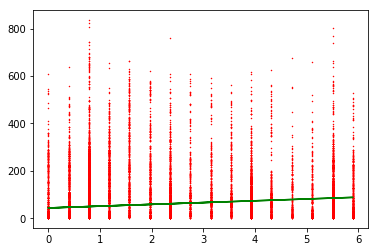

the train loss:
the test loss:


In [52]:
# this part is for part 1 wind
plot_simple_wind(0.005,200)

In [64]:
 print(x_test_wd.shape, y_test.shape)

(203904,) (203904,)


In [65]:
#preprocess the training matrix and its label so that it contains no nan's 
#then replace the str angle with numerical one
a=set(np.argwhere(pd.isnull(x_train))[:,0])
b=set(np.argwhere(pd.isnull(y_train))[:,0])
indices=list(a.union(b))
x_newTrain=np.delete(x_train,indices,axis=0)
y_newTrain=np.delete(y_train,indices,axis=0)
angles=getWindAngle(x_newTrain[:,4])
x_newTrain[:,4]=angles
print(x_newTrain)
print(pd.isnull(x_newTrain))

[[0.1 1021.1 -18.6 0.0 5.50651379004211 4.4]
 [-0.3 1021.5 -19.0 0.0 5.50651379004211 4.0]
 [-0.7 1021.5 -19.8 0.0 5.105088062083414 4.6]
 ...
 [-2.3 1022.7 -6.7 0.0 3.141592653589793 1.1]
 [-3.4 1023.6 -6.9 0.0 0.39269908169872414 1.0]
 [-3.8 1023.3 -5.8 0.0 2.356194490192345 1.2]]
[[False False False False False False]
 [False False False False False False]
 [False False False False False False]
 ...
 [False False False False False False]
 [False False False False False False]
 [False False False False False False]]


In [66]:
#do that same thing for test data
x_test1=x_test[:min(x_test.shape[0],y_test.shape[0]),:]
y_test1=y_test[:min(x_test.shape[0],y_test.shape[0])]
c=set(np.argwhere(pd.isnull(x_test1))[:,0])
d=set(np.argwhere(pd.isnull(y_test1))[:,0])
indices=list(c.union(d))
x_newTest=np.delete(x_test1,indices,axis=0)
y_newTest=np.delete(y_test1,indices,axis=0)
angles1=getWindAngle(x_newTest[:,4])
x_newTest[:,4]=angles1
print(x_newTest)

[[-5.3 1018.3 -7.1 0.0 3.141592653589793 0.8]
 [-5.4 1018.7 -7.1 0.0 3.141592653589793 1.1]
 [-5.9 1018.8 -7.6 0.0 3.141592653589793 1.5]
 ...
 [9.1 1014.6 -12.7 0.0 0.7853981633974483 1.7]
 [7.1 1015.2 -13.2 0.0 5.105088062083414 1.8]
 [7.4 1014.9 -11.9 0.0 0.0 1.4]]


In [67]:

#this method is to give a model(multidimensional)
def train_multiple(X,Y,X_test,Y_test,eta,epochs):
    original=0     #the original weight^2+bias^2
    #set placeholders and variables
    x=tf.placeholder(dtype=tf.float32)
    y=tf.placeholder(dtype=tf.float32)
    weight=tf.Variable(np.random.normal(size=(6,1)))
    bias=tf.Variable(np.random.normal())
    #the prediction with the current model
    bias=tf.cast(bias,tf.float32)
    weight=tf.cast(weight,tf.float32)
    result=tf.add(tf.matmul(x,weight),bias)
    loss=tf.reduce_mean(tf.square(result-y))
    optimizer=tf.train.AdamOptimizer(learning_rate=eta).minimize(loss)  #can choose adam if you want
    feed_dict={x:X,y:Y}
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch in range(epochs):
            sess.run(optimizer,feed_dict=feed_dict)
            if(epoch%20==0):
                print('cost:{}'.format(sess.run(loss,feed_dict=feed_dict)))
                print('w:{}'.format(weight.eval()))
                print('b:{}'.format(bias.eval()))
                print()
        print('the final result:')
        print(weight.eval())
        print(bias.eval())
        print('start testing:')
        prediction=sess.run(result,feed_dict={x:X_test})
        return X_test,Y_test,prediction

In [14]:
#this method is to give a model(multidimensional)
def train_multiple_SGD(X,Y,X_test,Y_test,eta,epochs,size):
    original=0     #the original weight^2+bias^2
    #set placeholders and variables
    x=tf.placeholder(dtype=tf.float32)
    y=tf.placeholder(dtype=tf.float32)
    weight=tf.Variable(np.random.normal(size=(6,1)))
    bias=tf.Variable(np.random.normal())
    #the prediction with the current model
    bias=tf.cast(bias,tf.float32)
    weight=tf.cast(weight,tf.float32)
    result=tf.add(tf.matmul(x,weight),bias)
    loss=tf.reduce_mean(tf.square(result-y))
    optimizer=tf.train.AdamOptimizer(learning_rate=eta).minimize(loss)  #can choose adam if you want
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch in range(epochs):
            start=time.time()
            indices=np.random.choice(range(X.shape[0]), size, replace=False)
            feed_dict={x:X[indices],y:Y[indices]}
            sess.run(optimizer,feed_dict=feed_dict)
            print('time spent on this epoch:{}'.format(time.time()-start))
            if(epoch%20==0):
                print('cost:{}'.format(sess.run(loss,feed_dict=feed_dict)))
                print('w:{}'.format(weight.eval()))
                print('b:{}'.format(bias.eval()))
                print()
        print('the final result:')
        print(weight.eval())
        print(bias.eval())
        print('start testing:')
        prediction=sess.run(result,feed_dict={x:X_test}).T[0]
        return X_test,Y_test,prediction,weight.eval().T[0],bias.eval()

    

In [331]:
#if you set the size to be the original one, your runnin out of memory
#so this way is not efficient, we have to use the stochastic one
size=int(x_newTrain.shape[0]/500)
train_multiple(x_newTrain[:size],y_newTrain[:size],x_newTest,y_newTest,0.0039,500)


cost:667832.875
w:[[ 0.2108975 ]
 [-0.7213204 ]
 [ 0.7439816 ]
 [-1.0230656 ]
 [ 0.04050484]
 [ 1.0644834 ]]
b:-1.4994467496871948



KeyboardInterrupt: 

In [25]:
from sklearn.preprocessing import normalize
#test of sgd 
#we gotta choose the best size for stochastic gradient descent
#first normalize the data
size=2**12
# x_newTrain1=normalize(np.array(x_newTrain,dtype='float32'), axis=1,norm='max')
# x_newTest1=normalize(np.array(x_newTest,dtype='float32'), axis=1,norm='max')
# y_newTrain1=np.array(y_newTrain,dtype='float32')
# y_newTest1=np.array(y_newTest,dtype='float32')
# # y_newTrain1=y_newTrain1/max(y_newTrain1)
# # y_newTest1=y_newTest1/max(y_newTest1)
# y_newTrain1=y_newTrain1/max(y_newTrain)
# y_newTest1=y_newTest1/max(y_newTrain)
x_t,y_t,pred,w,b=train_multiple_SGD(x_newTrain,y_newTrain,x_newTest,y_newTest,0.03,140,size)


time spent on this epoch:1.9731030464172363
cost:157701.203125
w:[[-0.88297635]
 [ 0.4807505 ]
 [-2.0850945 ]
 [ 1.3139902 ]
 [ 0.28853297]
 [ 0.36497054]]
b:-0.4386456608772278

time spent on this epoch:1.6778349876403809
time spent on this epoch:1.6734328269958496
time spent on this epoch:1.685600996017456
time spent on this epoch:1.65858793258667
time spent on this epoch:1.6695051193237305
time spent on this epoch:1.694239854812622
time spent on this epoch:1.67781400680542
time spent on this epoch:1.6594090461730957
time spent on this epoch:1.6680071353912354
time spent on this epoch:1.6567392349243164
time spent on this epoch:1.649461030960083
time spent on this epoch:1.8202030658721924
time spent on this epoch:2.130958080291748
time spent on this epoch:2.2826507091522217
time spent on this epoch:2.083552837371826
time spent on this epoch:1.9786219596862793
time spent on this epoch:2.2262258529663086
time spent on this epoch:1.886826992034912
time spent on this epoch:1.840022087097

In [35]:
np.mean(abs(np.dot(x_newTrain,w)+b-y_newTrain))
np.mean(abs(pred-y_newTest))



58.074527074901475

In [324]:
x_newTest.shape

(167079, 6)

epoch==0 the result is:
cost:11464.078125
w:5.533304214477539
b:1.1141688823699951

epoch==50 the result is:
cost:8835.82421875
w:2.6596994400024414
b:9.518150329589844

epoch==100 the result is:
cost:8358.6865234375
w:2.3258512020111084
b:17.234455108642578

epoch==150 the result is:
cost:7966.6181640625
w:2.023223876953125
b:24.229143142700195

epoch==200 the result is:
cost:7644.4541015625
w:1.7488981485366821
b:30.569692611694336

epoch==250 the result is:
cost:7379.728515625
w:1.500227451324463
b:36.3172721862793

epoch==300 the result is:
cost:7162.20166015625
w:1.2748119831085205
b:41.527347564697266

epoch==350 the result is:
cost:6983.4580078125
w:1.0704773664474487
b:46.250179290771484

epoch==400 the result is:
cost:6836.5830078125
w:0.8852509260177612
b:50.53135299682617

epoch==450 the result is:
cost:6715.89453125
w:0.7173476815223694
b:54.41213607788086

epoch==500 the result is:
cost:6616.72412109375
w:0.5651458501815796
b:57.93000793457031

the final result:
0.42980653

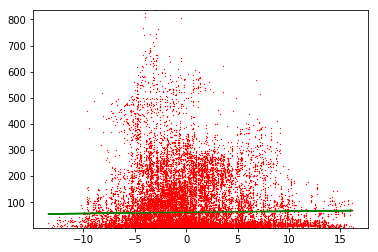

In [122]:
# use temp to predict the data
plot_simple(x_train_TEMP,y_train,x_test_TEMP,y_test,0.0025,550)

epoch==0 the result is:
cost:584664.1875
w:-0.6746215224266052
b:0.34626173973083496

epoch==50 the result is:
cost:79775.8359375
w:-0.19024822115898132
b:0.3467411696910858

epoch==100 the result is:
cost:15606.5234375
w:-0.017566580325365067
b:0.3469120264053345

epoch==150 the result is:
cost:7450.85595703125
w:0.04399535059928894
b:0.34697312116622925

epoch==200 the result is:
cost:6414.3017578125
w:0.06594251841306686
b:0.3469948470592499

the final result:
0.07367647
0.34700248
start testing:
the error for trainging:
0.0013254841912680637
the error for testing:
0.06574895774504268


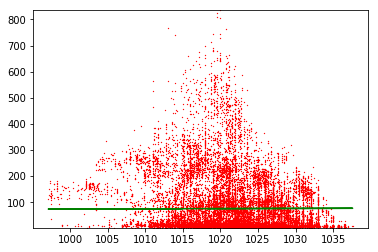

In [116]:
# use pres to predict the data
plot_simple(x_train_PRES,y_train,x_test_PRES,y_test,0.00000001,550)

epoch==0 the result is:
cost:13780.4365234375
w:5.015552997589111
b:-0.46888411045074463

epoch==50 the result is:
cost:8406.8076171875
w:1.7650718688964844
b:28.950634002685547

epoch==100 the result is:
cost:7030.95849609375
w:1.187024474143982
b:47.23093032836914

epoch==150 the result is:
cost:6508.34521484375
w:0.9754658341407776
b:58.57769775390625

epoch==200 the result is:
cost:6307.15380859375
w:0.8592259883880615
b:65.61949920654297

epoch==250 the result is:
cost:6229.67138671875
w:0.7886291146278381
b:69.98951721191406

epoch==300 the result is:
cost:6199.83154296875
w:0.7449754476547241
b:72.70147705078125

epoch==350 the result is:
cost:6188.33935546875
w:0.7179008722305298
b:74.38446807861328

epoch==400 the result is:
cost:6183.91357421875
w:0.7011003494262695
b:75.42889404296875

epoch==450 the result is:
cost:6182.208984375
w:0.6906749606132507
b:76.0770263671875

epoch==500 the result is:
cost:6181.55322265625
w:0.6842045187950134
b:76.47927856445312

epoch==550 the 

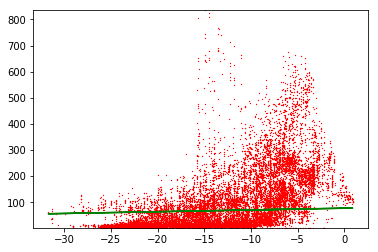

In [124]:
#use dewp to train the data
plot_simple(x_train_DEWP,y_train,x_test_DEWP,y_test,0.005,1550)

epoch==0 the result is:
cost:12202.84765625
w:0.342092901468277
b:2.1720588207244873

epoch==50 the result is:
cost:8437.3935546875
w:1.5283253192901611
b:32.58686828613281

epoch==100 the result is:
cost:7063.52783203125
w:1.6960134506225586
b:50.972713470458984

epoch==150 the result is:
cost:6560.1787109375
w:1.4108307361602783
b:62.09904861450195

epoch==200 the result is:
cost:6374.73388671875
w:0.9661969542503357
b:68.8407211303711

epoch==250 the result is:
cost:6305.90283203125
w:0.5055215954780579
b:72.93160247802734

epoch==300 the result is:
cost:6280.10302734375
w:0.09168622642755508
b:75.41815948486328

epoch==350 the result is:
cost:6270.3115234375
w:-0.25401246547698975
b:76.9324951171875

epoch==400 the result is:
cost:6266.53662109375
w:-0.5304515957832336
b:77.85678100585938

epoch==450 the result is:
cost:6265.05224609375
w:-0.7452205419540405
b:78.42236328125

epoch==500 the result is:
cost:6264.45703125
w:-0.908733606338501
b:78.76944732666016

the final result:
-1

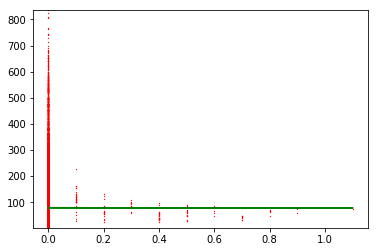

In [121]:
#use rain to train the data
plot_simple(x_train_RAIN,y_train,x_test_RAIN,y_test,0.005,550)

epoch==0 the result is:
cost:12284.32421875
w:1.119882345199585
b:0.13221830129623413

epoch==50 the result is:
cost:8357.87109375
w:16.48349952697754
b:22.36812400817871

epoch==100 the result is:
cost:7697.015625
w:13.126969337463379
b:34.72350311279297

epoch==150 the result is:
cost:7216.52734375
w:9.066191673278809
b:44.90116882324219

epoch==200 the result is:
cost:6859.13623046875
w:5.481907367706299
b:53.6458854675293

epoch==250 the result is:
cost:6593.26708984375
w:2.3846895694732666
b:61.1859130859375

epoch==300 the result is:
cost:6395.47998046875
w:-0.2870919704437256
b:67.68907928466797

epoch==350 the result is:
cost:6248.341796875
w:-2.591554641723633
b:73.2981185913086

epoch==400 the result is:
cost:6138.88330078125
w:-4.579178333282471
b:78.13597869873047

epoch==450 the result is:
cost:6057.45361328125
w:-6.293525695800781
b:82.30867004394531

epoch==500 the result is:
cost:5996.87744140625
w:-7.772162914276123
b:85.90764617919922

epoch==550 the result is:
cost:5

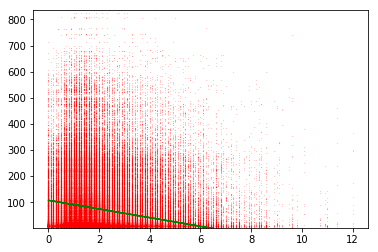

In [126]:
# use wspm to train the data
plot_simple(x_train_WSPM,y_train,x_test_WSPM,y_test,0.005,1550)

/Users/lingjun/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.
  app.launch_new_instance()


epoch==0 the result is:
cost:11242.291015625
w:2.851797580718994
b:1.6591393947601318

epoch==50 the result is:
cost:7963.43701171875
w:14.259713172912598
b:17.530210494995117

epoch==100 the result is:
cost:7496.93603515625
w:11.626448631286621
b:28.00125503540039

epoch==150 the result is:
cost:7152.7568359375
w:9.340843200683594
b:36.989356994628906

epoch==200 the result is:
cost:6898.8203125
w:7.377569198608398
b:44.709716796875

epoch==250 the result is:
cost:6711.4658203125
w:5.691206932067871
b:51.34114074707031

epoch==300 the result is:
cost:6573.23583984375
w:4.242702007293701
b:57.03722381591797

epoch==350 the result is:
cost:6471.24951171875
w:2.998502731323242
b:61.929893493652344

epoch==400 the result is:
cost:6396.0029296875
w:1.9297876358032227
b:66.13249969482422

epoch==450 the result is:
cost:6340.486328125
w:1.01181161403656
b:69.74234771728516

epoch==500 the result is:
cost:6299.5263671875
w:0.22331951558589935
b:72.84298706054688

epoch==550 the result is:
cos

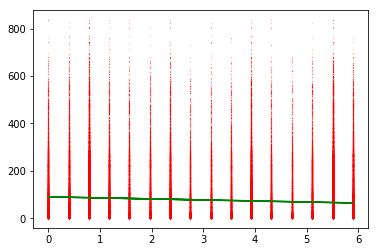

In [128]:
# use wind to train the data
plot_simple_wind(0.005,1500)